# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
url = 'https://raw.githubusercontent.com/fellmir/pyDataScienceBootcamp/main/input_data/KNN_Project_Data.csv'
df = pd.read_csv(url)

**Check the head of the dataframe.**

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [23]:
# answer from original notebook

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

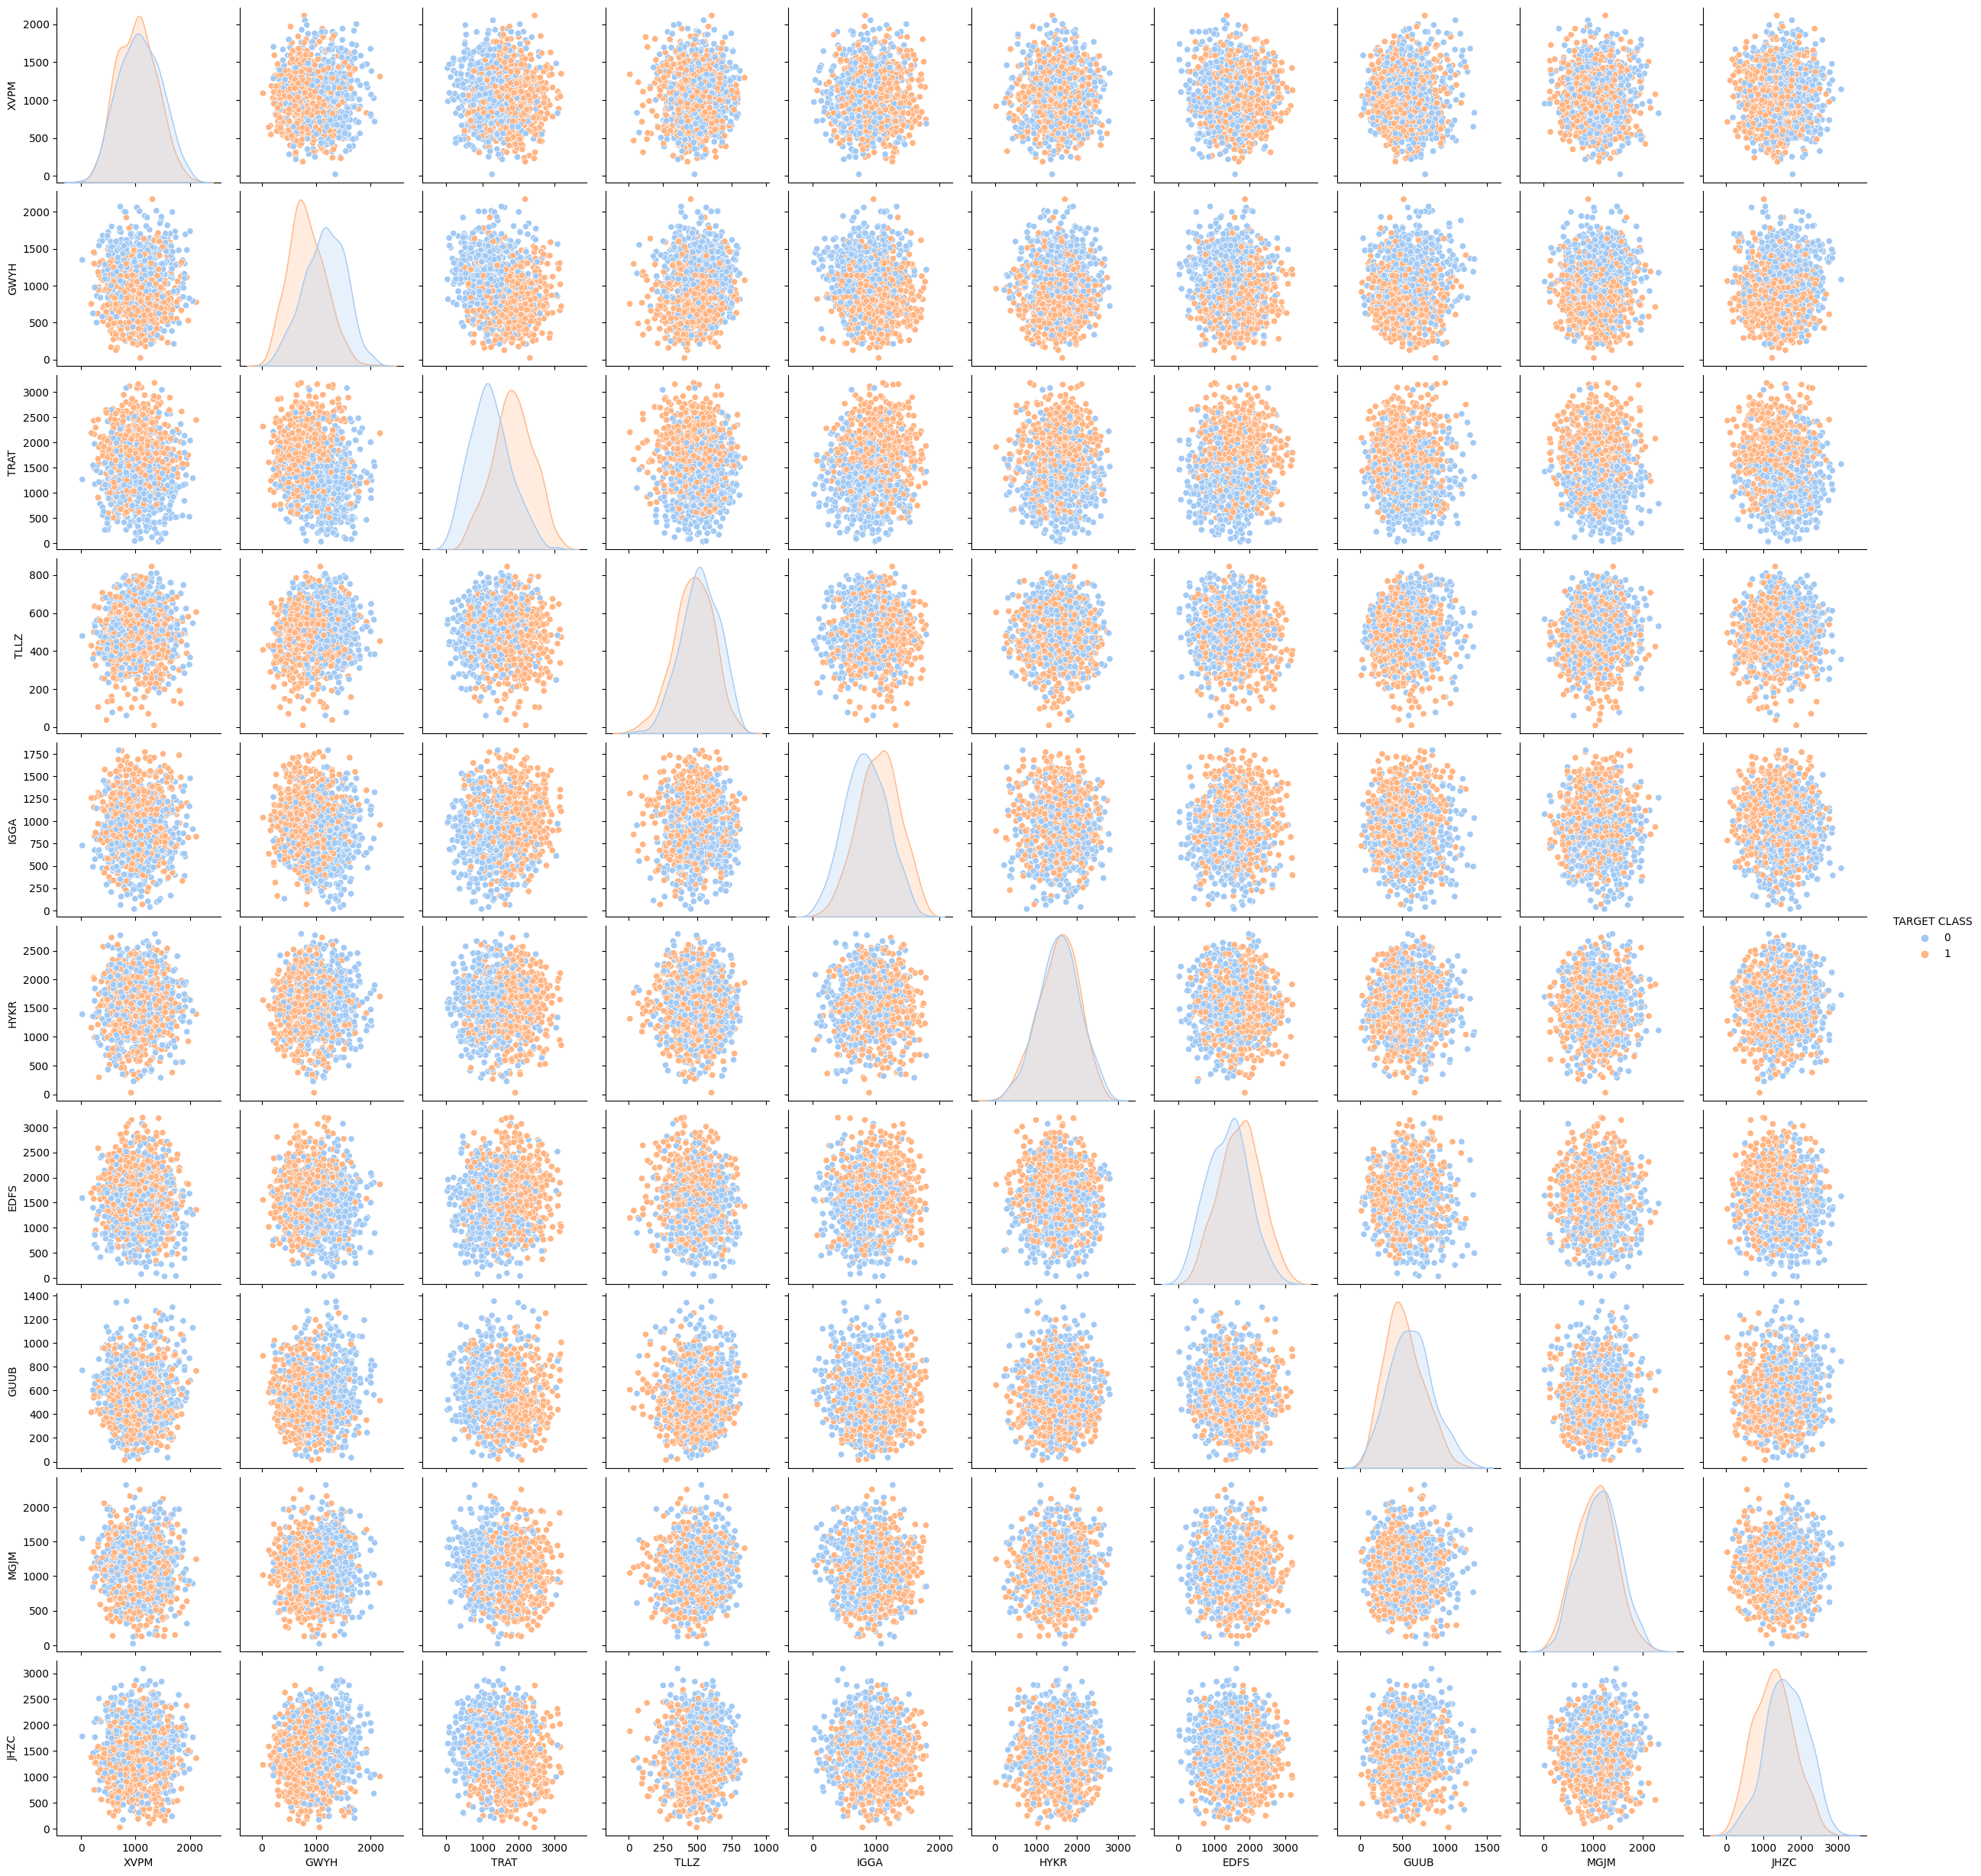

In [11]:
sns.pairplot(data=df, hue='TARGET CLASS', palette="pastel", kind='scatter')

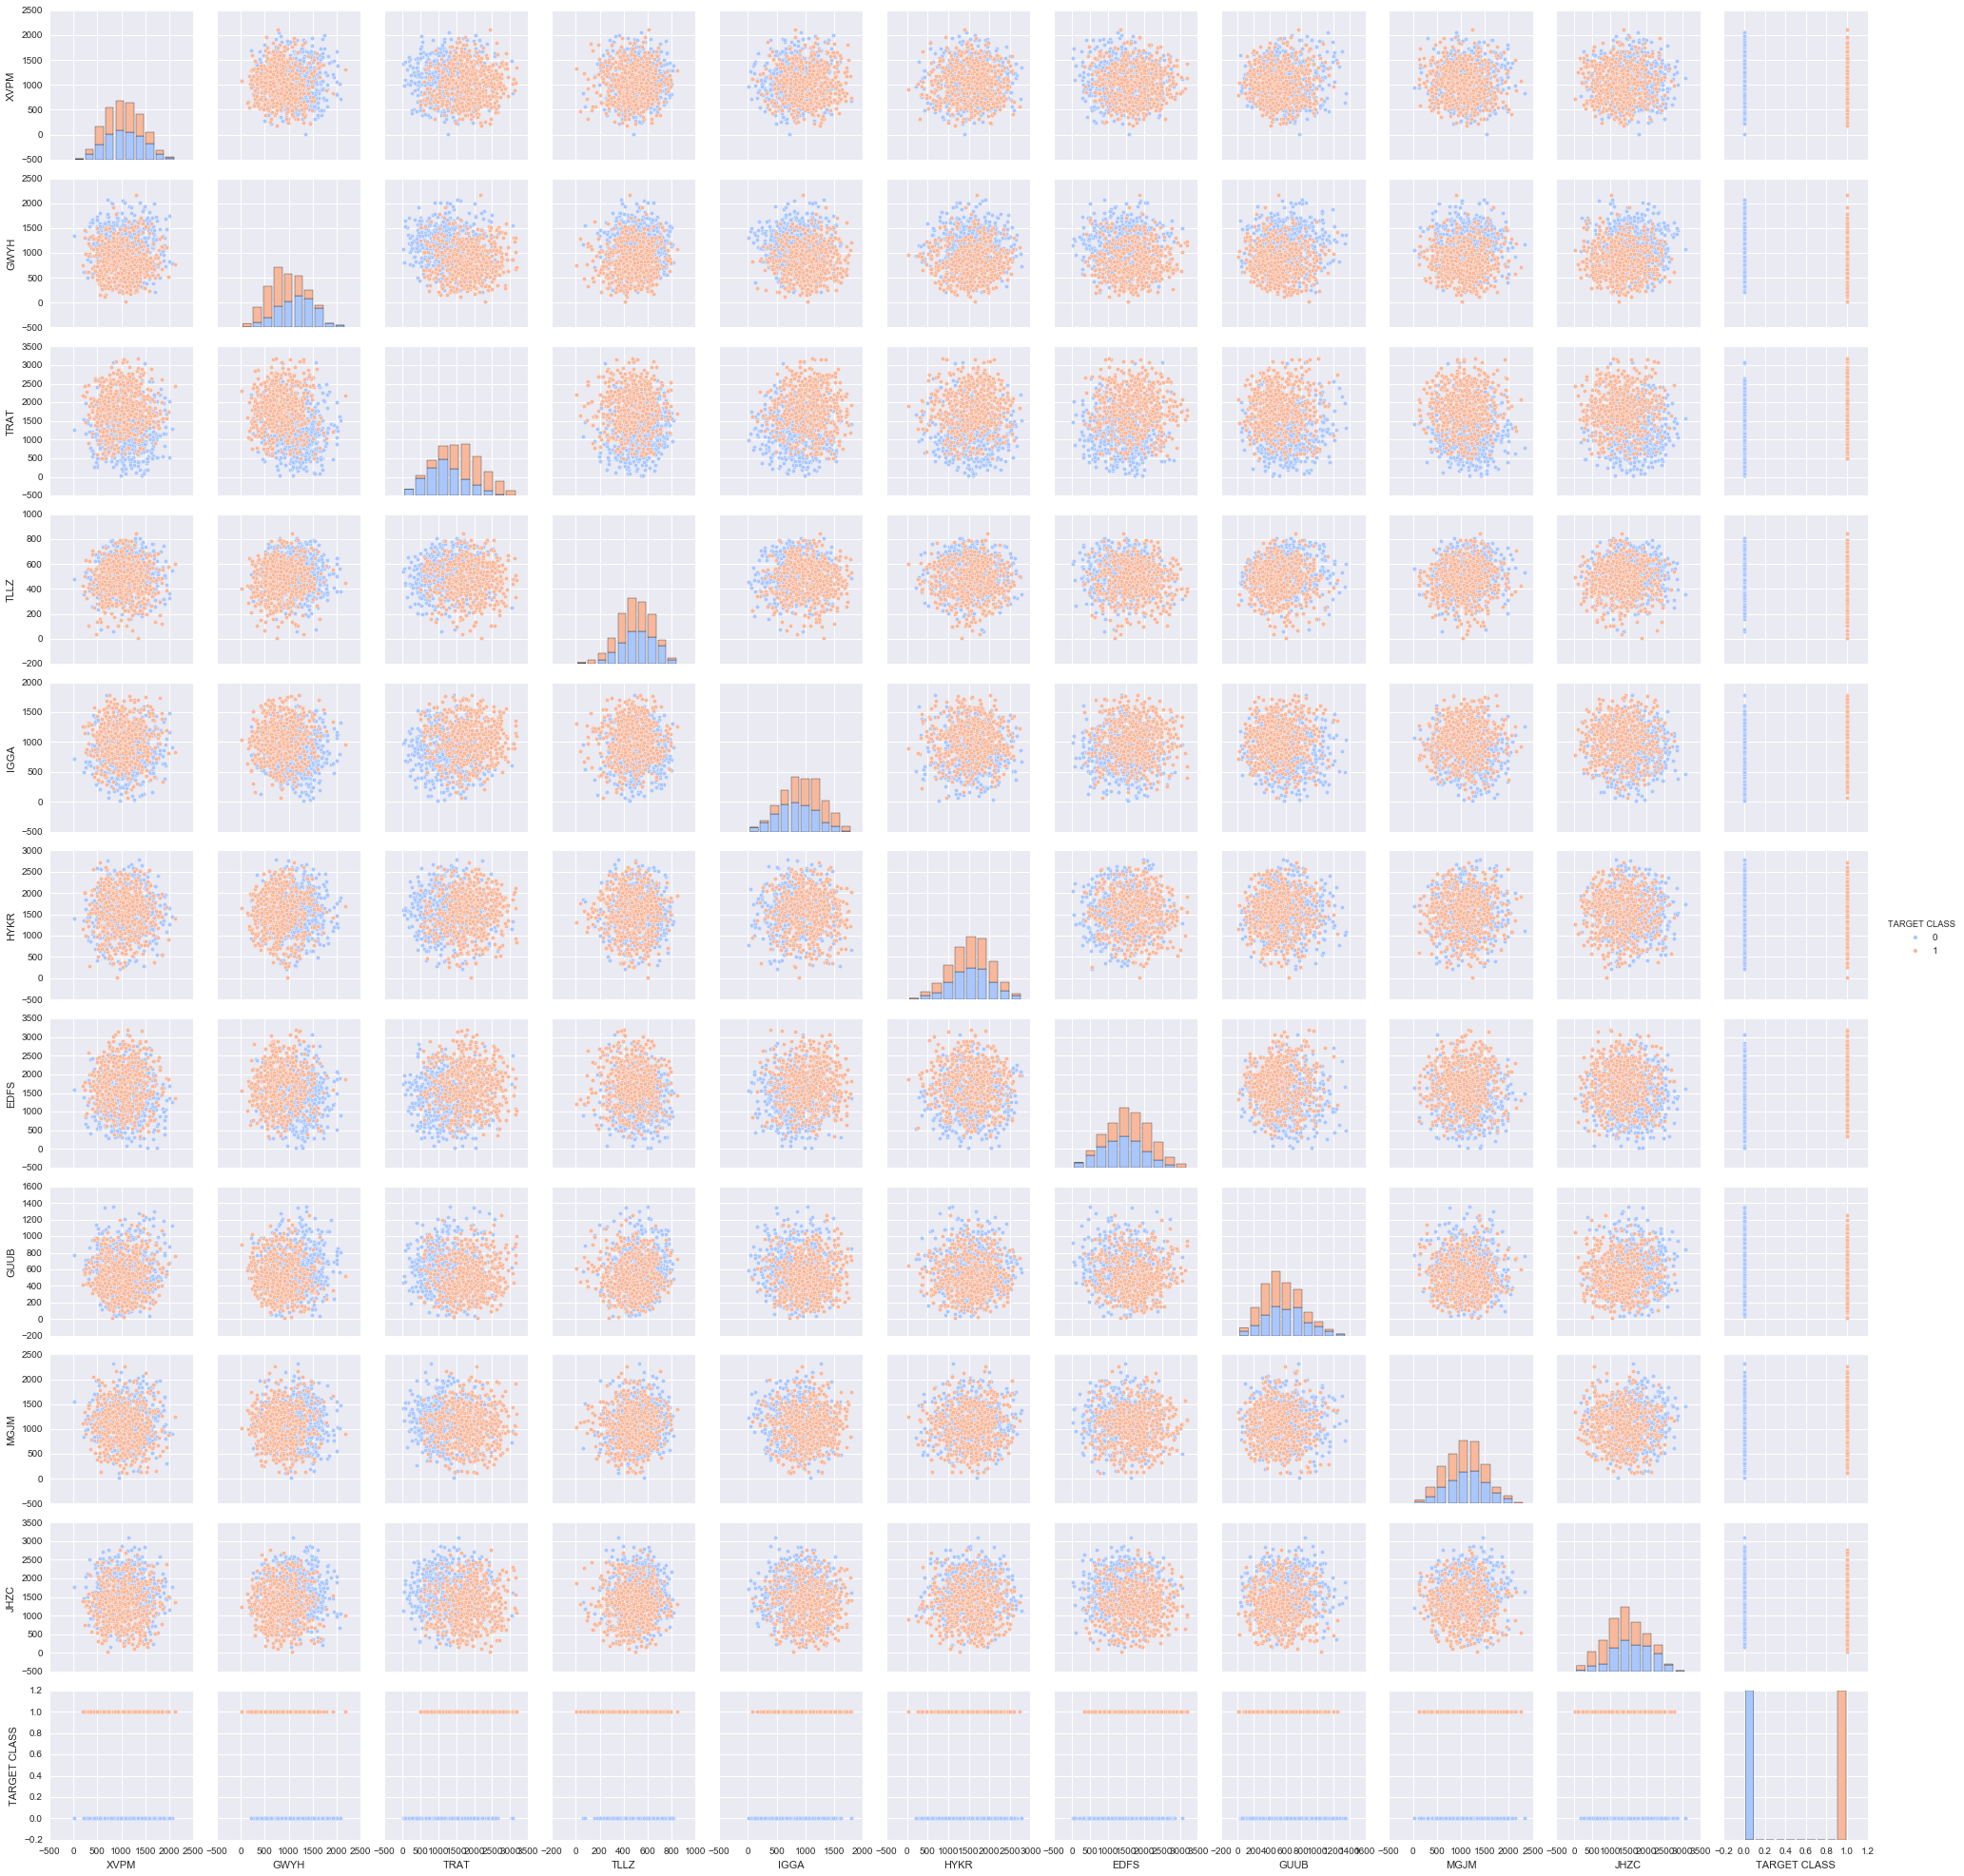

In [4]:
# answer from original notebook

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [17]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_train_feat = pd.DataFrame(X_train_scaled, columns=df.columns[:-1])
df_test_feat = pd.DataFrame(X_test_scaled, columns=df.columns[:-1])

** Create a StandardScaler() object called scaler.**

In [6]:
# done above

** Fit scaler to the features.**

In [7]:
# answer from original notebook

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [8]:
# done above

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
# done above

In [21]:
df_train_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0 -2.131207 -0.029876 -0.070741  1.011517 -0.332789 -1.132088 -1.079541   
1  0.551623 -1.708943  0.268688  0.458320  1.216487 -0.080555  0.934718   
2  0.492807 -1.186567  0.283564 -0.724657 -0.387366 -1.314568  1.201963   
3  0.473814  0.376672  0.200586  0.409384 -1.979776  1.228047  1.800494   
4 -0.025188 -0.425766  1.465413  0.357559  0.641439  0.316196  0.519274   

       GUUB      MGJM      JHZC  
0  0.190234 -0.459044 -0.293330  
1 -0.215476  0.294657  1.362008  
2 -1.494292 -0.505361 -0.628549  
3  0.634393  1.210954 -0.144551  
4 -0.551063 -0.064037 -2.187418

In [9]:
# answer from original notebook

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [10]:
# done above - fit only X_train to avoid data leakage

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [12]:
# done above

**Create a KNN model instance with n_neighbors=1**

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
# answer from original notebook

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [25]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [28]:
# print out the confusion matrix
labels = np.unique(y)

cm = metrics.confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
     0    1
0  113   39
1   39  109


In [17]:
# answer from original notebook

[[112  40]
 [ 34 114]]


In [27]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.74      0.74      0.74       148

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [18]:
# answer from original notebook

             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

Text(0, 0.5, 'Error Rate')

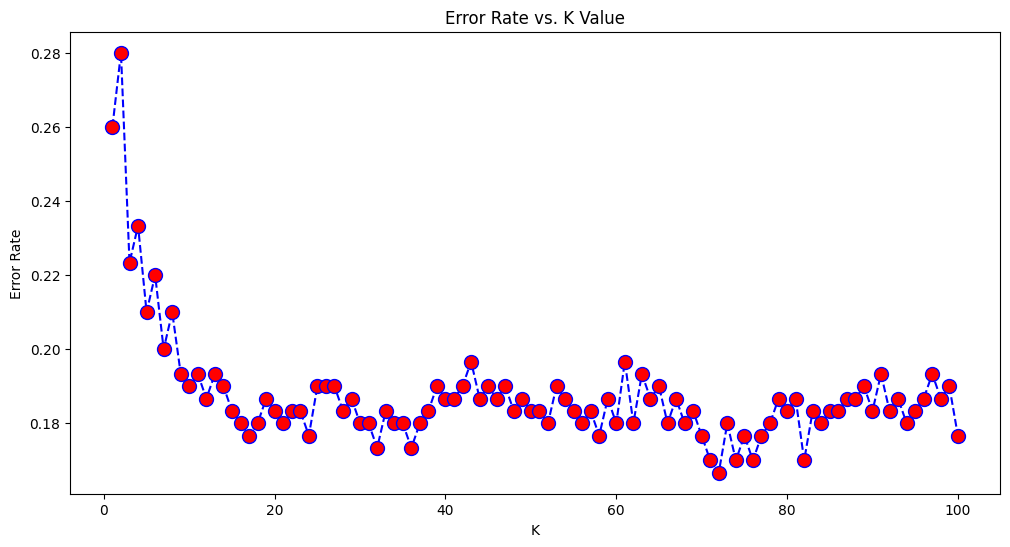

In [32]:
error_rate = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,101),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Now create the following plot using the information from your for loop.**

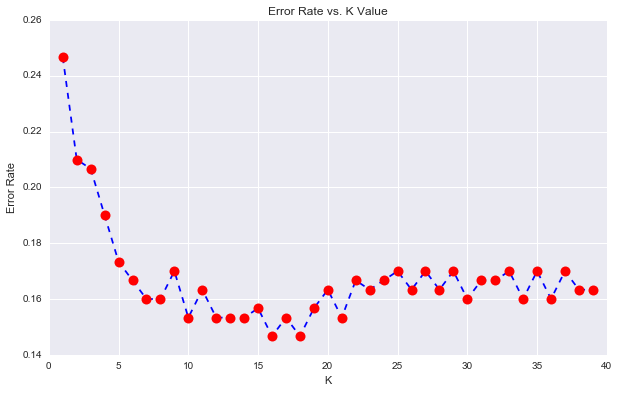

In [20]:
# answer from original notebook

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [36]:
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=32')
print('\n')
labels = np.unique(y)

cm = metrics.confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print("Confusion Matrix:")
print(cm_df)
print('\n')
print(metrics.classification_report(y_test,pred))

# all metrics went up, which is seemingly a good sign

WITH K=32


Confusion Matrix:
     0    1
0  124   28
1   24  124


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [21]:
# answer from original notebook

WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



# Great Job!